# Prediction for bank loan campaign using demographic data

**Context:**

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Data Description:**

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# read dataset
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
cols  = df.columns
cols 

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
# check for null values 
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* Income seems to have skewed distribution. 
* Mortgage column is unclear.

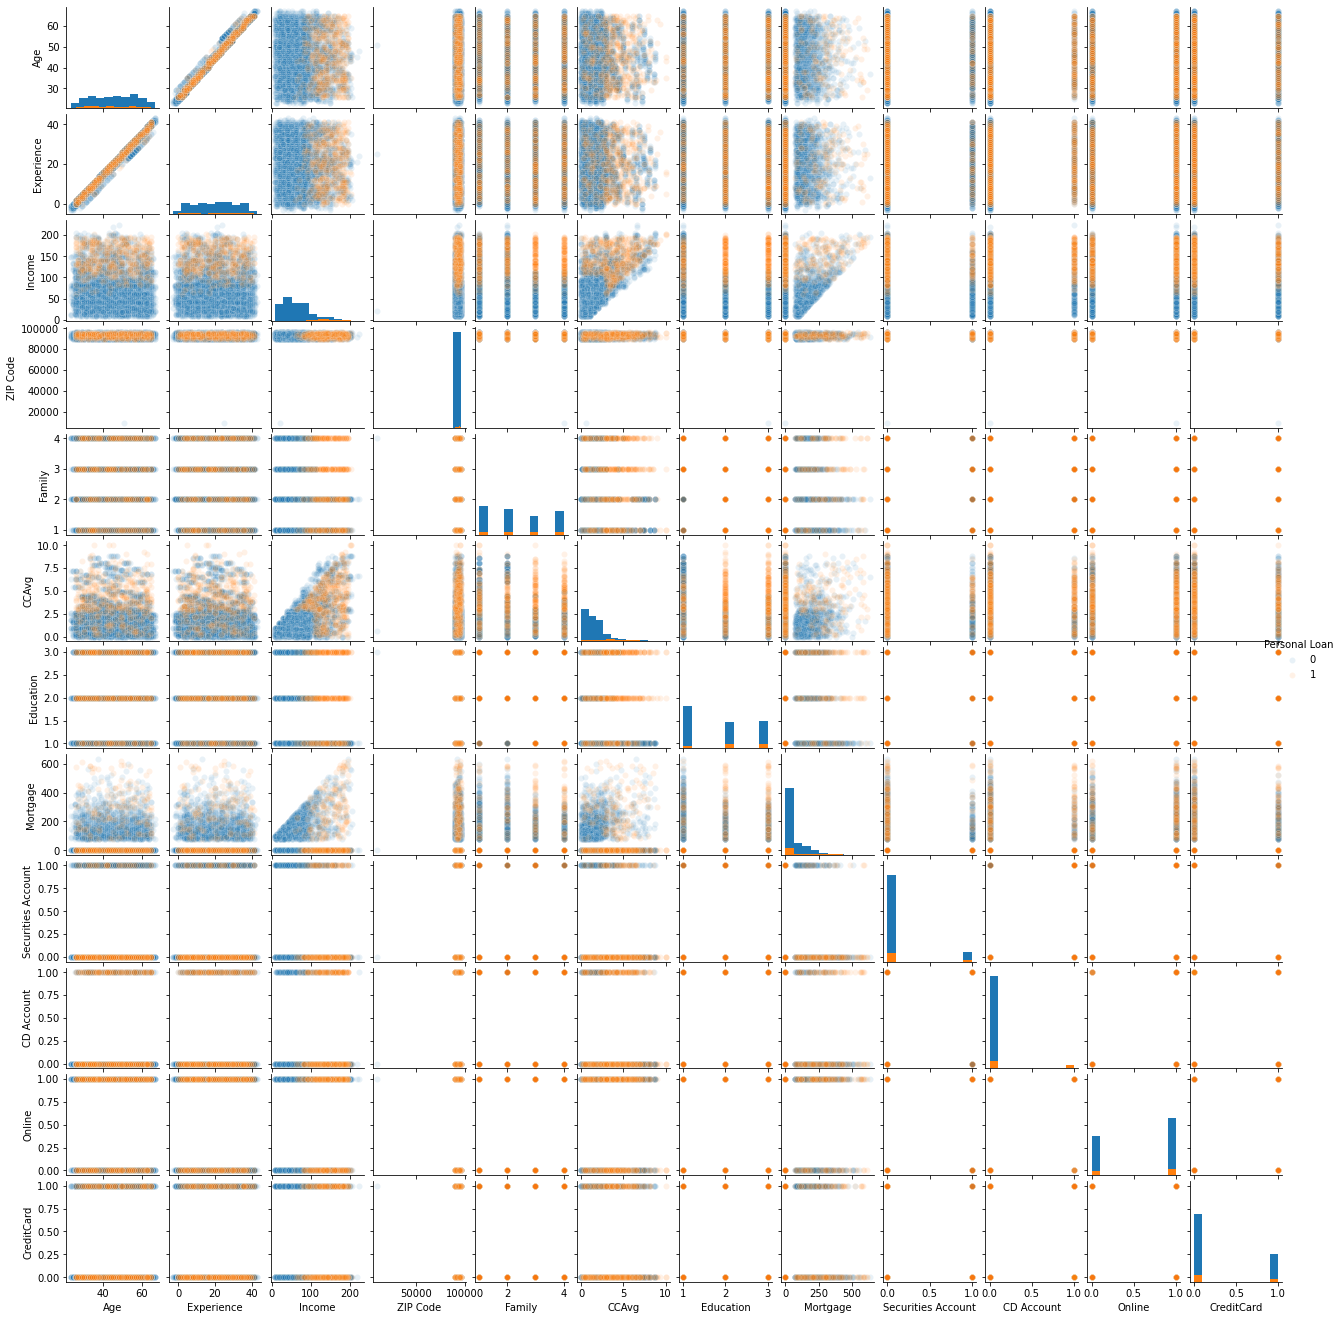

In [8]:
s = sns.pairplot(df.iloc[:,1:], diag_kind='hist', hue = 'Personal Loan',plot_kws={'alpha':0.1})
s.fig.set_figheight(18)
s.fig.set_figwidth(18)

* Age and experience are highly correlated 
* Mortgage can be separated into categorical and continous variables since it's distribution shows a separate band with cluster of data points
* Age, Experience, Income, CCAvg, Mortgage, CreditCard, CD Account seem to classify the liabilty and potential customers 

In [9]:
df0 = df[df['Personal Loan'] == 0]
df1 = df[df['Personal Loan'] == 1]

In [10]:
# Number of people who have not taken personal loan previously 
df0.shape[0]

4520

In [11]:
# Number of people who have taken personal loan previously 
df1.shape[0]

480

* There are very few instances of people who have taken personal loan previously in the given data

In [12]:
columns = list(cols.ravel())
remove_list = ['ID','Securities Account','CD Account', 'Online', 'CreditCard','Personal Loan']
columns = [i for i in columns if i not in remove_list]

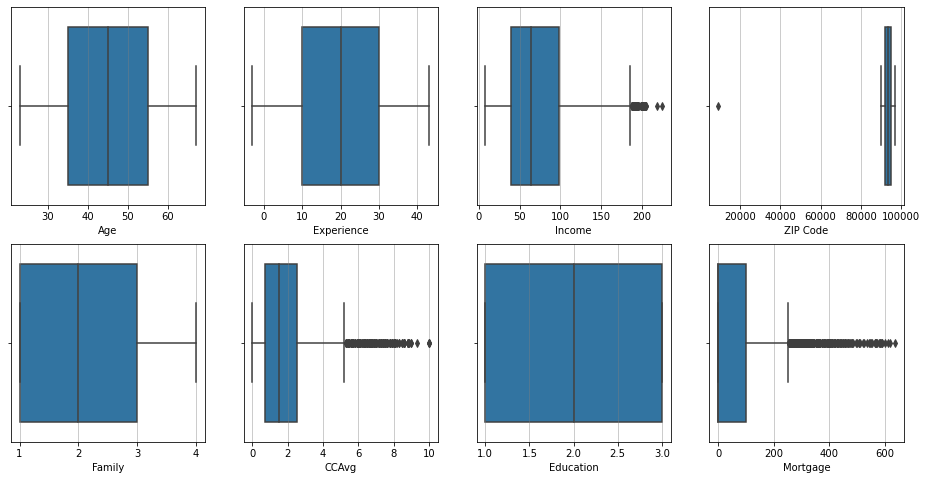

In [13]:
# checking for outliers 
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(16,8))
j=1
for i in columns:
    
    _=plt.subplot(2,4,j)
    ax=sns.boxplot(df[i])
    j+=1
    ax.xaxis.grid(True,color='grey',alpha = 0.5)

* range of experience goes into negative values 
* income distribution is skewed 

#### Effect of Income

In [14]:
from scipy import stats

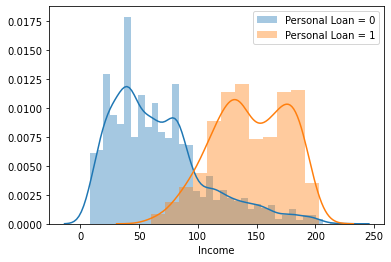

In [15]:
i0 = df.Income[df['Personal Loan'] == 0]
i1 = df.Income[df['Personal Loan'] == 1]
f, ax = plt.subplots()
sns.distplot(i0, label = 'Personal Loan = 0')
sns.distplot(i1, label = 'Personal Loan = 1')
plt.legend()
plt.show()

In [16]:
t_stst, p = stats.ttest_ind(i0, i1)
print("t statistic",t_stst)
print('Null hypothesisis rejected as the p_value',p,' < 0.05')

t statistic -41.08533291207552
Null hypothesisis rejected as the p_value 0.0  < 0.05


* There is significant difference in income between people who availed loan and those who did not. Hence it is a strong predictor for liability customers.

#### Effect of Age

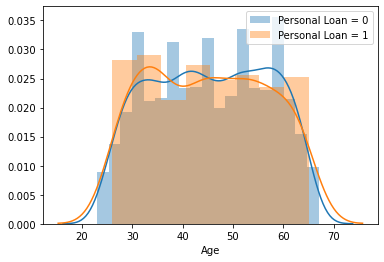

In [17]:
f, ax = plt.subplots()
sns.distplot(df.Age[df['Personal Loan'] == 0], label = 'Personal Loan = 0')
sns.distplot(df.Age[df['Personal Loan'] == 1], label = 'Personal Loan = 1')
plt.legend()
plt.show()

* But there does not appear to be difference in age between people who availed loan and those who did not.
* Hence the difference observed in the pairplot between loan seekers and liability customers is due to the coorelation between Age and Income

#### Effect of Avg. spending on credit cards per month

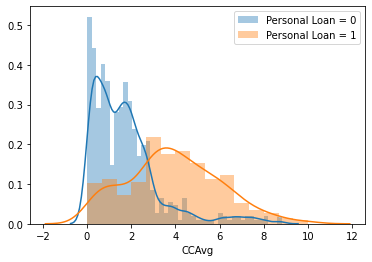

In [18]:
f, ax = plt.subplots()
sns.distplot(df.CCAvg[df['Personal Loan'] == 0], label = 'Personal Loan = 0')
sns.distplot(df.CCAvg[df['Personal Loan'] == 1], label = 'Personal Loan = 1')
plt.legend()
plt.show()

* Avg. spending on credit cards per month seems to differ between the classes

#### Mortgage

In [19]:
df['Mortgage taken?'] = np.zeros(df.shape[0])
j=0
for item in df.Mortgage:
    
    if (item > 0):
        df.loc[j,'Mortgage taken?'] = 1
    j+=1
        

In [20]:
df_M = df[df['Mortgage'] > 0]

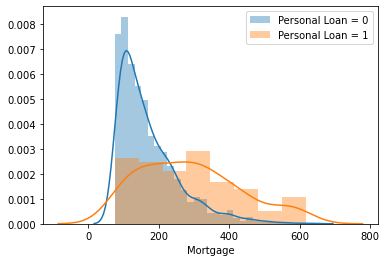

In [21]:
f, ax = plt.subplots()
sns.distplot(df_M.Mortgage[df_M['Personal Loan'] == 0], label = 'Personal Loan = 0')
sns.distplot(df_M.Mortgage[df_M['Personal Loan'] == 1], label = 'Personal Loan = 1')
plt.legend()
plt.show()

* Mortgage seems to differ amongst the classes

#### Effect of number of members in family on personal loan

In [22]:
# Chi_square test 
Ho = "Number of members in family have no effect on loan"   # Null Hypothesis
Ha = "Number of members in family have effect on loan"   # Alternate Hypothesis
crosstab_f = pd.crosstab(df['Personal Loan'],df['Family'])  # Contingency table 
crosstab_f

Family,1,2,3,4
Personal Loan,,,,
0,1365,1190,877,1088
1,107,106,133,134


In [23]:
chi, p_val, dof, expected =  stats.chi2_contingency(crosstab_f)

if p_val < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_val.round(6)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_val.round(6)}) > 0.05')

Number of members in family have effect on loan as the p_value (2e-06) < 0.05


In [24]:
crosstab_f.iloc[0,:] = (crosstab_f.iloc[0,:])/np.sum(crosstab_f.iloc[0,:])
crosstab_f.iloc[1,:] = (crosstab_f.iloc[1,:])/np.sum(crosstab_f.iloc[1,:])
crosstab_f

Family,1,2,3,4
Personal Loan,,,,
0,0.301991,0.263274,0.194027,0.240708
1,0.222917,0.220833,0.277083,0.279167


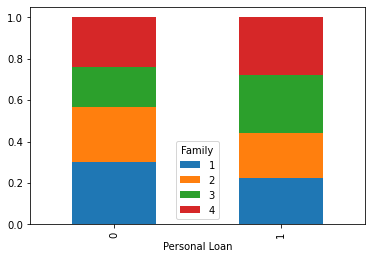

In [25]:
_=crosstab_f.plot.bar(stacked=True)
_=plt.legend(title='Family')

* Although, visually observing, number of members in family does not seem to predict if the customer will avail loan or not

#### Zip Code 

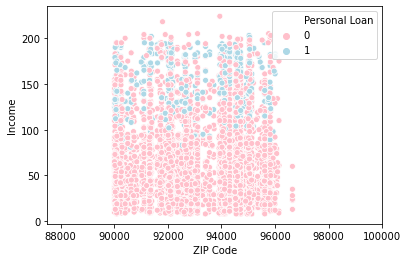

In [26]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(df['ZIP Code'], df.Income,hue=df['Personal Loan'],palette= ['pink','lightblue'] )
ax.set(xlim=(87500, 100000))
plt.show()

* Zip code does not seem to differentiate between the classes; the difference seen is due to income difference 

#### Education 

In [27]:
# Chi_square test 
Ho = "Education no effect on loan"   # Null Hypothesis
Ha = "Education has effect on loan"   # Alternate Hypothesis
crosstab_e = pd.crosstab(df['Personal Loan'],df['Education'])  # Contingency table 
crosstab_e

Education,1,2,3
Personal Loan,,,
0,2003,1221,1296
1,93,182,205


In [28]:
crosstab_e.iloc[0,:] = (crosstab_e.iloc[0,:])/np.sum(crosstab_e.iloc[0,:])
crosstab_e.iloc[1,:] = (crosstab_e.iloc[1,:])/np.sum(crosstab_e.iloc[1,:])
crosstab_e

Education,1,2,3
Personal Loan,,,
0,0.443142,0.270133,0.286726
1,0.193750,0.379167,0.427083


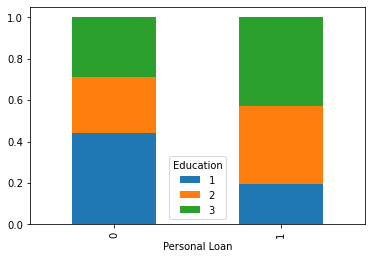

In [29]:
_=crosstab_e.plot.bar(stacked=True)
plt.legend(title='Education')

* Education seems to matter for Loan

In [30]:
chi, p_ , dof, expected =  stats.chi2_contingency(crosstab_e)

if p_ < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_}) > 0.05')

Education no effect on loan as the p_value (0.9307336834094345) > 0.05


#### Securities account

In [31]:
crosstab_s = pd.crosstab(df['Personal Loan'],df['Securities Account'])  # Contingency table 
crosstab_s

Securities Account,0,1
Personal Loan,,
0,4058,462
1,420,60


In [32]:
crosstab_s.iloc[0,:] = (crosstab_s.iloc[0,:])/np.sum(crosstab_s.iloc[0,:])
crosstab_s.iloc[1,:] = (crosstab_s.iloc[1,:])/np.sum(crosstab_s.iloc[1,:])
crosstab_s

Securities Account,0,1
Personal Loan,,
0,0.897788,0.102212
1,0.875000,0.125000


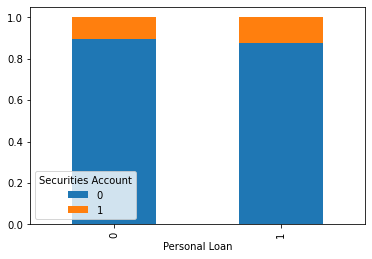

In [33]:
_=crosstab_s.plot.bar(stacked=True)
plt.legend(title='Securities Account')

* Securities account does not seem to matter for personal loan

#### Credit card

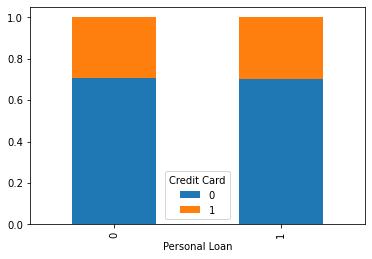

In [34]:
crosstab_cc = pd.crosstab(df['Personal Loan'],df['CreditCard'])  # Contingency table 

crosstab_cc.iloc[0,:] = (crosstab_cc.iloc[0,:])/np.sum(crosstab_cc.iloc[0,:])
crosstab_cc.iloc[1,:] = (crosstab_cc.iloc[1,:])/np.sum(crosstab_cc.iloc[1,:])
crosstab_cc
_=crosstab_cc.plot.bar(stacked=True)
plt.legend(title='Credit Card')

* Credit card does not seem to matter for personal loan

#### CD Account

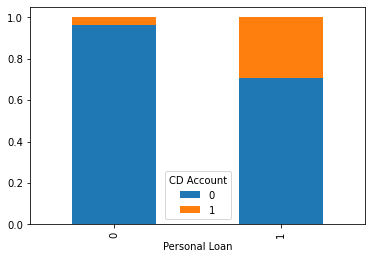

In [35]:
crosstab_cd = pd.crosstab(df['Personal Loan'],df['CD Account'])  # Contingency table 

crosstab_cd.iloc[0,:] = (crosstab_cd.iloc[0,:])/np.sum(crosstab_cd.iloc[0,:])
crosstab_cd.iloc[1,:] = (crosstab_cd.iloc[1,:])/np.sum(crosstab_cd.iloc[1,:])
crosstab_cd
_=crosstab_cd.plot.bar(stacked=True)
plt.legend(title='CD Account')

* CD Account seems to matter for personal loan

In [36]:
# Chi_square test 
Ho = "CD Account no significant effect on loan"   # Null Hypothesis
Ha = "CD Account has effect on loan"   # Alternate Hypothesis
chi, p_val, dof, expected =  stats.chi2_contingency(crosstab_cd)

if p_val < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_val.round(6)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_val.round(6)}) > 0.05')

CD Account no significant effect on loan as the p_value (0.155029) > 0.05


In [37]:
################# Preprocessing ###################

In [38]:
feature_set_1 = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'CD Account']

In [39]:
x = df[feature_set_1]
y = df['Personal Loan']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
scale.fit(X_test)
X_test = scale.transform(X_test)

## KNN Classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [44]:
scores_test=[]
scores_train=[]
for k in range(1,12):
    NNH=KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    NNH.fit(X_train, y_train)
    y_predict = NNH.predict(X_test)
    st=NNH.score(X_test,y_test)
    scores_test.append(st)
    
    t_predict = NNH.predict(X_train)
    sr=NNH.score(X_train,y_train)
    scores_train.append(sr)

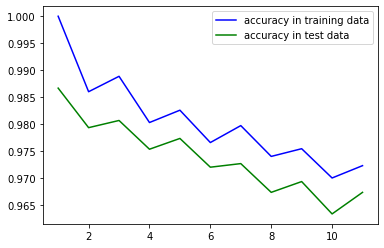

In [45]:
fig,ax = plt.subplots()
_=ax.plot(range(1,12), scores_train, 'b-', label='accuracy in training data')
_=ax.plot(range(1,12), scores_test, 'g-', label='accuracy in test data')
_=ax.legend(loc='best')    

In [46]:
print("Accuracy score on test data = %.4f"%(max(scores_test)))
print("Accuracy score on training data = %.4f"%(max(scores_train)))

Accuracy score on test data = 0.9867
Accuracy score on training data = 1.0000


In [47]:
knn = metrics.confusion_matrix(y_test, y_predict)

In [48]:
print(knn)

[[1355    5]
 [  44   96]]


In [49]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.95      0.69      0.80       140

    accuracy                           0.97      1500
   macro avg       0.96      0.84      0.89      1500
weighted avg       0.97      0.97      0.96      1500



## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
print("Score on test data", model.score(X_test, y_test))
print("Score on training data:", model.score(X_train, y_train))

Score on test data 0.9486666666666667
Score on training data: 0.9445714285714286


##### Logistic regression Confusion matrix 

In [53]:
test_predict = model.predict(X_test)
log_reg = metrics.confusion_matrix(y_test, test_predict)

In [54]:
print(log_reg)

[[1342   18]
 [  59   81]]


In [55]:
print(metrics.classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1360
           1       0.82      0.58      0.68       140

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



## Naive Bayes Classification

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [58]:
print("Score on test data", model.score(X_test, y_test))
print("Score on training data:", model.score(X_train, y_train))

Score on test data 0.8913333333333333
Score on training data: 0.8922857142857142


In [59]:
NB = metrics.confusion_matrix(y_test, y_predict)

In [60]:
print(NB)

[[1255  105]
 [  58   82]]


In [61]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1360
           1       0.44      0.59      0.50       140

    accuracy                           0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.91      0.89      0.90      1500



#### * Comparing Confusion matrices *

In [62]:
print(knn) # for Knn

[[1355    5]
 [  44   96]]


In [63]:
print(log_reg) # for logistic regression

[[1342   18]
 [  59   81]]


In [64]:
print(NB) # for Naive Bayes

[[1255  105]
 [  58   82]]


From the confusion matrices it can seen that KNN gives the best performance.

##### 3D Visualization of data

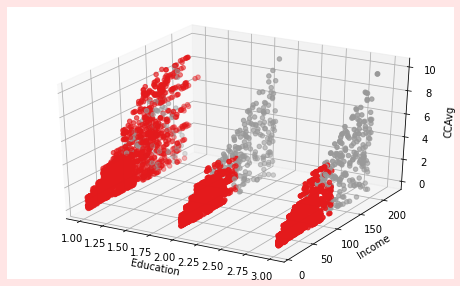

In [65]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(8,5), edgecolor='r', facecolor=(1, 0, 0, .1))
ax = fig.add_subplot(111, projection='3d')

xx = x['Education']
yy = x['Income']
zz = x['CCAvg']

ax.scatter(xx,yy,zz, c = y , cmap='Set1')

_=ax.set_xlabel('Education')
_=ax.set_ylabel('Income')
_=ax.set_zlabel('CCAvg')

From the above plot data can be seen clustered according to the most important features identified earlier. Hence KNN algorithm is able to identify the class of each test point with minimal error, given the most immediate neighbors; as can be observed from the knn accuracy scores which peak at k = 1,2.  

In [66]:
#